In [9]:
from mysql.connector import connect, Error
from getpass import getpass

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
try:
    conn = connect(host='localhost', user='root',password='root',database='mydoc')
except Error as e:
    print(e)

# EXPLORATORY DATA ANALYSIS

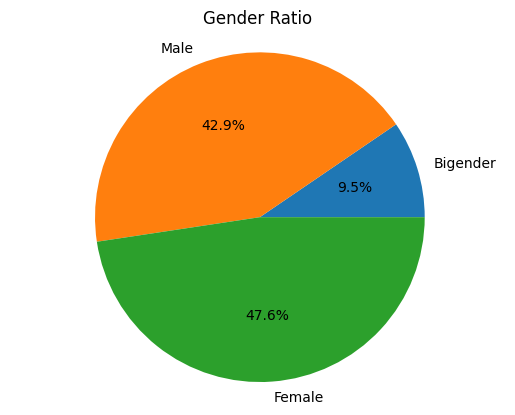

In [11]:
query = "SELECT gender,count(*) FROM users GROUP BY gender"

with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()
    
gender_ratio_df = pd.DataFrame(result)
gender_ratio_df.columns = ["Gender", "Count"]

plt.pie(gender_ratio_df["Count"], labels=gender_ratio_df["Gender"], autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.axis('equal')
plt.show()

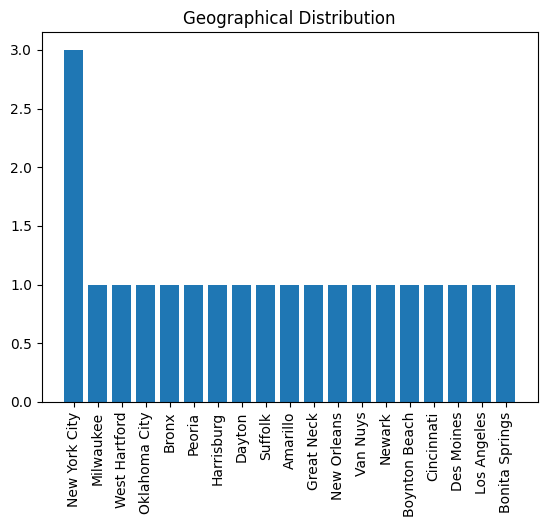

In [12]:
query = "SELECT city,count(*) FROM users GROUP BY city ORDER BY count(*) desc"

with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()
    
city_count_df = pd.DataFrame(result)
city_count_df.columns = ["City", "Count"]

plt.bar(city_count_df["City"], city_count_df["Count"])
plt.title('Geographical Distribution')
plt.xticks(rotation=90)
plt.show()

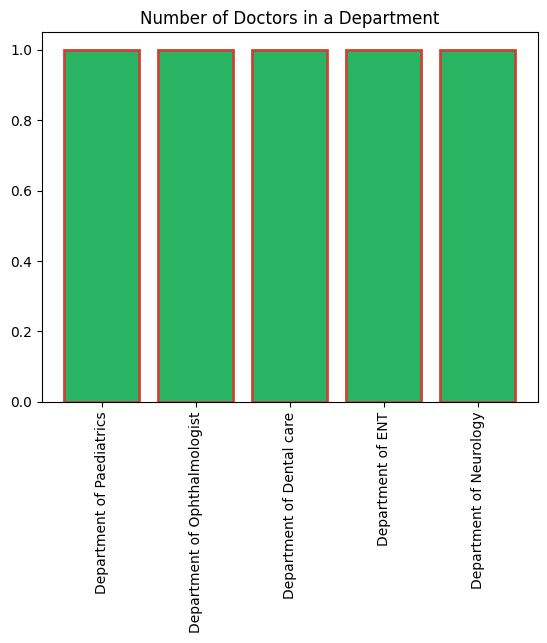

In [13]:
query = """SELECT name as name_of_department,count(number_doctors) as number_of_doctors
           FROM doctors d,doc_dept dd,departments dp
           WHERE d.doctor_id = dd.doctor_id 
           AND dd.department_id = dp.department_id
           GROUP BY name
           ORDER BY count(number_doctors) desc
           LIMIT 5"""

with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()
    
name_df = pd.DataFrame(result)
name_df.columns = ["name_of_department", "number_of_doctors"]

plt.bar(name_df["name_of_department"], name_df["number_of_doctors"], color ="#28B463", edgecolor ="#CB4335", linewidth = 2)
plt.title('Number of Doctors in a Department')
plt.xticks(rotation=90)
plt.show()

# LOGIN / SIGNUP

In [14]:
query = "SELECT city,count(*) FROM users GROUP BY city ORDER BY count(*) desc"

with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()

In [15]:
# login_signup_var = input("Signup or Login?: ")

# if login_signup_var == "Signup":
#     users_firstname = input("Enter Firstname: ")
#     users_lastname = input("Enter Lastname: ")
#     users_gender = input("Enter Gender: ")
#     users_dob = input("Enter Date of Birth: ")
#     users_address = input("Enter Address: ")
#     users_city = input("Enter City: ")
#     users_state = input("Enter State: ")
#     users_phone_number = input("Enter Mobile Number: ")
#     users_email = input("Enter Email ID: ")
#     users_ssn = input("Enter SSN: ")
#     users_password = input("Enter Password: ")

In [18]:
status_code = ""
message = ""
with conn.cursor() as cursor:
    cursor.callproc('bookAppointment',(4,11,3,4,"20:00:00","2022-11-30",status_code,message))
    results = cursor.stored_results()
    for result in results:
        print(result.fetchall())

[(-1, 'Doctor Not Available')]


# APPOINTMENT BOOKING

User enters 2 things:
1. Date
2. Slot
3. Hospital

Returns:
1. Doctors are Available on that day
2. Doctors have any prior appointments booked in that slot

<b>Scenarios:</b>
1. Highest Appointments are from which:<br>
    a. Hospital<br>
    b. Department
    
2. Top 5 departments
3. Top 5 doctors
4. Slots most preferred

# DIAGNOSIS (PRESCRIPTION AND/OR LAB TESTS)

1. Both Prescriptions and Lab Tests
2. Medicines with Changing Daily Dosage, No of Days
3. Medicines with Fixed Daily Dosage, No of Days

Same with Lab Tests

# PAYMENTS

# FEEDBACK

<b> Views </b>

Doctor - This Week's Appointments View

User - All Appointments and their corresponding diagnosis

Reviews